# K-Nearest Neighbors (KNN) 

Considerations:
KNN is based on an underlying principle that a data point is similar to its neighbor
KNN assigns a label to new data based on its 'distance' with old historical data.
This distance can be measured using different matrics like Euclidean, Minkowski, Chebyshev, Manhattan.
KNN is affected by the magnitude differences of features hence it is essential to scale all features to a similar range.
We know the label assigned changes with value of k (# of neighbors).
To determine optimum number of neighbors, we use elbow method or grid search multiple values of k and select optimum k value which gives least error and highest accuracy.
In case of tie- by default sklearn algorithm chooses the closest distanced label. 
Or to avoid a tie situation we may always choose an odd value of k.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df.duplicated().sum()

1

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.shape

(213, 10)

In [7]:
df.Type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [8]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


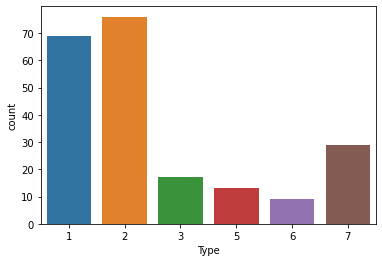

In [21]:
sns.countplot(x='Type',data=df)

In [9]:
df.groupby(by='Type').mean()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,1.518669,13.228261,3.548551,1.173913,72.631449,0.452319,8.786087,0.012899,0.057826
2,1.518619,13.111711,3.002105,1.408158,72.598026,0.521053,9.073684,0.050263,0.079737
3,1.517964,13.437059,3.543529,1.201176,72.404706,0.406471,8.782941,0.008824,0.057059
5,1.518928,12.827692,0.773846,2.033846,72.366154,1.470000,10.123846,0.187692,0.060769
6,1.517456,14.646667,1.305556,1.366667,73.206667,0.000000,9.356667,0.000000,0.000000
7,1.517116,14.442069,0.538276,2.122759,72.965862,0.325172,8.491379,1.040000,0.013448


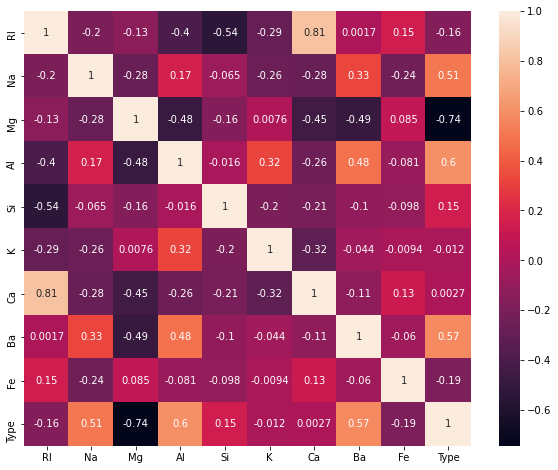

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

In [16]:
df.corr()['Type'].sort_values()

# We see Mg, Al, Ba, Al are highly correlated to type

Mg     -0.744195
Fe     -0.191090
RI     -0.160140
K      -0.012455
Ca      0.002677
Si      0.147725
Na      0.508837
Ba      0.574896
Al      0.597432
Type    1.000000
Name: Type, dtype: float64

In [20]:
# Train test split
X = df.drop(columns='Type')
y = df['Type']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
# Create a pipeline of scaler and knn model
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

from sklearn.pipeline import Pipeline
pipeline = Pipeline([('scaler',scaler),('knn',model)])

In [25]:
# Grid search for best performing parameters

k_values = list(np.arange(1,31))

from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=pipeline, param_grid= {'knn__n_neighbors':k_values}, scoring='accuracy',cv=5)

grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29, 30]},
             scoring='accuracy')

In [26]:
grid.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

In [27]:
grid.cv_results_

{'mean_fit_time': array([0.00418887, 0.00259309, 0.00312428, 0.00312438, 0.        ,
        0.003124  , 0.00312419, 0.00312428, 0.00624828, 0.00312424,
        0.00312409, 0.00624866, 0.00312428, 0.00312414, 0.00312419,
        0.00312428, 0.00624862, 0.00312424, 0.00312443, 0.00624866,
        0.00312419, 0.00312414, 0.00312448, 0.00312409, 0.00312414,
        0.00312424, 0.        , 0.00452161, 0.0029882 , 0.00338793]),
 'std_fit_time': array([7.46646060e-04, 1.35283833e-03, 6.24856949e-03, 6.24876022e-03,
        0.00000000e+00, 6.24799728e-03, 6.24837875e-03, 6.24856949e-03,
        7.65255303e-03, 6.24847412e-03, 6.24818802e-03, 7.65302024e-03,
        6.24856949e-03, 6.24828339e-03, 6.24837875e-03, 6.24856949e-03,
        7.65296184e-03, 6.24847412e-03, 6.24885559e-03, 7.65302024e-03,
        6.24837875e-03, 6.24828339e-03, 6.24895096e-03, 6.24818802e-03,
        6.24828339e-03, 6.24847412e-03, 0.00000000e+00, 5.77672095e-03,
        7.55843302e-06, 4.85035701e-04]),
 'mean_scor

In [28]:
accuracy = grid.cv_results_['mean_test_score']

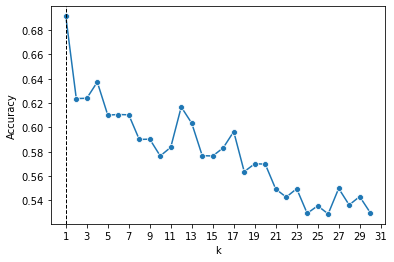

In [44]:
sns.lineplot(x=k_values,y=accuracy,marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.axvline(x=1,color='black',ls='--',lw=1)
plt.xticks(np.arange(1,32,2));

              precision    recall  f1-score   support

           1       0.61      0.78      0.68        18
           2       0.73      0.67      0.70        24
           3       0.00      0.00      0.00         4
           5       0.67      1.00      0.80         4
           6       1.00      0.67      0.80         3
           7       1.00      0.73      0.84        11

    accuracy                           0.69        64
   macro avg       0.67      0.64      0.64        64
weighted avg       0.70      0.69      0.69        64



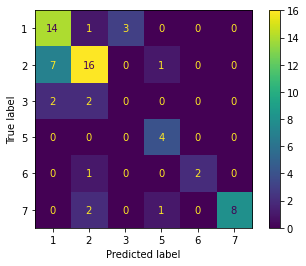

In [46]:
# Final model evaluation

from sklearn.metrics import plot_confusion_matrix, classification_report

print(classification_report(y_test,grid.predict(X_test)))
plot_confusion_matrix(grid,X_test,y_test);

# Thank you!